In [7]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [37]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 17 10:07:45 2018

@author: kalas
"""

# from pylab import *
#from scipy import optimize
# from sympy.solvers import solve
# from sympy import Symbol, re
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt
# from scipy import interpolate
# from scipy.signal import savgol_filter
# import csv
# import os
# from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.gridspec as gridspec
#import tvregdiff
from scipy.optimize import curve_fit
#import JJformulas
import time
# import numdifftools as nd


def I_func(V,I, val ,dv = 0.005, datmin = -20): # works only for quantised data
     
     return I [   np.around(((val - datmin)/dv)).astype(int)]
    

def Bess_zero(alp1, n, alp2, k):
    dif = []
    zero = []
    alp = []
    eps = 0.001 
   
    for im in np.arange (-120,121):
        red = special.jv(im-k,alp2)
        grn = special.jv(-im-k,alp2)
 
        if (red - grn /1) < 0.009:# and abs(red) > 0.0000000001  :

            alp = np.append(alp, alp2)
            zero = np.append(zero, im)

    return alp, zero
        
        
     
def Iqp(V, G1 = 1/100 , G2 = 1/1e4, V0 = 3.7):
    return G2*V + (G1-G2)*np.tanh(V/V0)



def Inorm(V, Rn = 10, Vg = 3.7e-3, dVg = 0.16e-3, Ai = 0.08):
    return (2*np.exp(-V/dVg)/(1 + np.exp(-V/dVg) ) - 1 )*Vg/Rn*Ai + V/Rn 


def Ileak(V, Rj = 450,  dVg = 0.16e-3, Aleak = 3, I0 = 1e-6):
    return ( 1 - 2*np.exp(-V/dVg*Aleak)/(1 + np.exp(-V/dVg*Aleak) ) )*I0 + V/Rj 


def Idc(V, Vg = 3.7e-3,  dVg = 0.16e-3, Ak = 0.108, Qv = 6, Qk = 15):
    V = V*1e-3
    expfact = np.exp( - (1 - np.abs(V/Vg))*(Vg/dVg)*Qv )
    return Ileak(V) + (Inorm(V) - Ileak(V))*( expfact / (1 + expfact ) )*(1 + Ak*np.exp(-(1 - np.abs(V/Vg))**2*(Vg/dVg)*Qk ) ) 

    
    




fdir = 'E:\\OneDrive - Rutgers University\\files_Py\\hm\\'



file = 'shitov_q_woknee.dat'

ivcs = np.genfromtxt(fdir + file, skip_header = 1 ) 

Vdc_t = ivcs[: , 0]
Idc_t = (ivcs[: , 1])#np.sin(2*pi*Vdc_t)/np.exp(abs(2*Vdc_t)) + Vdc_t# ivcs[: , 1] 



Vkk_t = ivcs[: , 2] *2
Ikk_t = ivcs[: , 3]

# define vars
alpha1 = 100
freq1 = 3e9 # frequency in hz

def Vf(freq):
    return 4.14e-15*freq*1e3 #voltage step in mV


n_i_max = 120
n_i_min = -120
i_list = np.arange( n_i_min, n_i_max +1)


vmin = 0
vmax = 5
Nv = 200




V = np.linspace(vmin, vmax, Nv)


Vg = 0.5e-3 #mV
Rn = 3e3 #Ohm



def calc_pumpIV(V, alpha, freq, Vdc_t  = Vdc_t, Idc_t = Idc_t):

    Vf1 = Vf(freq)
    
    I = 0
    
    
    
    for i in i_list:
#        I += special.jv(i, alpha)**2*I_func (Vdc_t , Idc_t, V + Vf1*i)
        I += special.jv(i, alpha)**2*Idc ( V + Vf1*i)

    return I






<IPython.core.display.Javascript object>


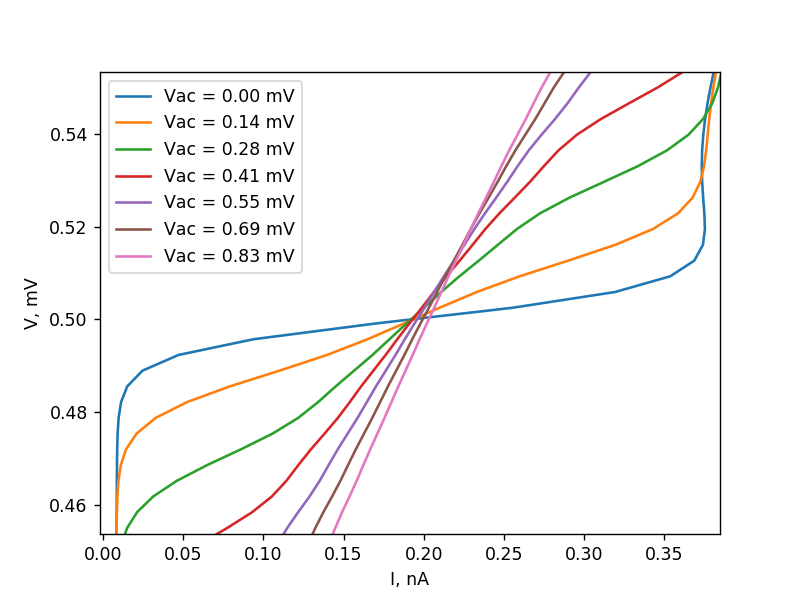

In [38]:
f_pump = 10e9

for alpha in np.linspace(0, 20, 7):
    I = calc_pumpIV(V, alpha, f_pump)
    
    Vac = Vf(f_pump)*alpha
    plt.plot(I*1e3, V/3.7*0.5, label = 'Vac = {:1.2f} mV'.format(Vac) )
    

plt.xlabel('I, nA')
plt.ylabel('V, mV')

plt.legend()